<center>
<b><font size="10">Telecom X - Etapa 2</font></b>
</center>

<br/>
<center>
<b><font color="#FA8072" size="6">Modelagem Preditiva de Evasão de Clientes</font></b>
</center>

🎯 <b><font color="#FA8072">OBJETIVO GERAL:</font></b>

- Desenvolver **modelos preditivos supervisionados** com a finalidade de identificar clientes com maior propensão à descontinuidade dos serviços contratados.

- Visando **mitigar a evasão de clientes**, será implementado um pipeline de ciência de dados robusto para esta etapa exploratória de modelagem.

🧠 <b><font color="#FA8072">OBJETIVOS ESPECÍFICOS:</font></b>

- Realizar a preparação dos dados para fins de **modelagem preditiva**, incluindo etapas de limpeza, codificação e normalização das variáveis.

- Conduzir **análise exploratória de correlação** e aplicar técnicas de **seleção de atributos** relevantes.

- Treinar múltiplos **algoritmos de classificação** com validação de desempenho.

- Avaliar a performance dos modelos preditivos utilizando **métricas estatísticas apropriadas**.

- **Interpretar os resultados** com foco na análise da importância dos preditores.

- Formular uma **síntese estratégica** destacando os principais determinantes da evasão de clientes.

🧰 <b><font color="#FA8072">ESCOPO DO DESAFIO:</font></b>

- ✅ Aplicação de técnicas de pré-processamento voltadas à modelagem com algoritmos de aprendizado de máquina.

- ✅ Construção, treinamento e validação de modelos de previsão.

- ✅ Análise interpretativa dos resultados e extração de **insights estratégicos** baseados em dados.

- ✅ Produção de uma comunicação técnica com foco na **tomada de decisão gerencial**.

# 📌 <b><font color="#FA8072" size="6">ETAPA 1: EXTRAÇÃO DE DADOS</font></b>

---

Para iniciar análise, importado os [dados da API da Telecom X](https://drive.google.com/file/d/1Dul9YDaHCzXo8jFJKceEhzarRkjwLYnK/view?usp=drive_link). Esses dados estão disponíveis no formato `CSV` e contêm as informações já tratadas.

In [2]:
# Importação de bibliotecas essenciais para análise de dados e visualização
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações estéticas globais
sns.set_palette("pastel")
plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["axes.facecolor"] = "#FA8072"  # salmão
plt.rcParams["figure.facecolor"] = "#FA8072"
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.labelcolor"] = "black"
plt.rcParams["xtick.color"] = "black"
plt.rcParams["ytick.color"] = "black"
plt.rcParams["text.color"] = "black"


In [3]:
from typing import List
import pandas as pd
from IPython.display import display, HTML

def exibir_top_valores_variaveis_categoricas(df: pd.DataFrame, max_exibir: int = 3) -> None:
    """
    Apresenta os principais valores de frequência das variáveis categóricas de um DataFrame.

    Parâmetros:
    - df: Conjunto de dados a ser analisado
    - max_exibir: Número máximo de categorias mais frequentes a serem exibidas
    """
    variaveis_categoricas: List[str] = df.select_dtypes(include='object').columns.tolist()

    for variavel in variaveis_categoricas:
        titulo_html = f"<strong style='font-size: 15px;'> {variavel.upper()}</strong>"
        display(HTML(titulo_html))

        frequencia = (
            df[variavel]
            .value_counts(dropna=False)
            .head(max_exibir)
            .to_frame(name='Frequência')
        )
        display(frequencia)
        print("-" * 40)

dados = pd.read_csv(r'C:\Users\danil\OneDrive\Área de Trabalho\Curso-AluraONE-DS\Estatística e Machine Learning\Challenge_TelecomX_parte2\Outros\dados_tratados.csv')

# Execução da função
if 'dados' in globals():
    exibir_top_valores_variaveis_categoricas(dados)
else:
    print("A variável 'dados' não está definida. Execute a célula que carrega os dados antes.")

,Frequência
ID_Cliente,
9995-HOTOH,1
0002-ORFBO,1
0003-MKNFE,1


----------------------------------------


,Frequência
Cancelamento,
No,5163
Yes,1869
Não informado,224


----------------------------------------


,Frequência
Gênero,
Male,3669
Female,3587


----------------------------------------


,Frequência
Possui_Companheiro,
No,3747
Yes,3509


----------------------------------------


,Frequência
Possui_Dependentes,
No,5086
Yes,2170


----------------------------------------


,Frequência
Telefone_Ativo,
Yes,6551
No,705


----------------------------------------


,Frequência
Multiplas_Linhas,
No,3490
Yes,3061
No phone service,705


----------------------------------------


,Frequência
Tipo_Internet,
Fiber optic,3198
DSL,2483
No,1575


----------------------------------------


,Frequência
Seguranca_Online,
No,3607
Yes,2074
No internet service,1575


----------------------------------------


,Frequência
Backup_Online,
No,3181
Yes,2500
No internet service,1575


----------------------------------------


,Frequência
Protecao_Dispositivo,
No,3194
Yes,2487
No internet service,1575


----------------------------------------


,Frequência
Suporte_Tecnico,
No,3581
Yes,2100
No internet service,1575


----------------------------------------


,Frequência
Streaming_TV,
No,2895
Yes,2786
No internet service,1575


----------------------------------------


,Frequência
Streaming_Filmes,
No,2866
Yes,2815
No internet service,1575


----------------------------------------


,Frequência
Tipo_Contrato,
Month-to-month,4005
Two year,1733
One year,1518


----------------------------------------


,Frequência
Fatura_Digital,
Yes,4308
No,2948


----------------------------------------


,Frequência
Forma_Pagamento,
Electronic check,2445
Mailed check,1657
Bank transfer (automatic),1587


----------------------------------------


In [4]:
# Carregamento da base de dados e visualização inicial de sua estrutura
arquivo_csv = r"C:\Users\danil\OneDrive\Área de Trabalho\Curso-AluraONE-DS\Estatística e Machine Learning\Challenge_TelecomX_parte2\Outros\dados_tratados.csv"
dados = pd.read_csv(arquivo_csv)

# Exibir as primeiras entradas do dataset
dados.head()



,ID_Cliente,Cancelamento,Gênero,Idoso,Possui_Companheiro,Possui_Dependentes,Meses_de_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Valor_Mensal,Valor_Total,tempo_estimado_meses,Conta_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,9.044207,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,9.055092,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,3.800406,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,12.631122,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,3.187128,2.796667


In [5]:
# Relatório de características gerais do dataset
def relatorio_estrutura_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    """Gera relatório descritivo com nome das variáveis, tipos e percentual de valores ausentes."""
    estrutura = pd.DataFrame({
        "Variável": df.columns,
        "Tipo de Dado": df.dtypes.values,
        "Porcentagem Nulos (%)": df.isnull().mean().round(4) * 100
    })
    return estrutura

relatorio_estrutura_dataframe(dados)


,Variável,Tipo de Dado,Porcentagem Nulos (%)
ID_Cliente,ID_Cliente,object,0.0
Cancelamento,Cancelamento,object,0.0
Gênero,Gênero,object,0.0
Idoso,Idoso,int64,0.0
Possui_Companheiro,Possui_Companheiro,object,0.0
Possui_Dependentes,Possui_Dependentes,object,0.0
Meses_de_Contrato,Meses_de_Contrato,int64,0.0
Telefone_Ativo,Telefone_Ativo,object,0.0
Multiplas_Linhas,Multiplas_Linhas,object,0.0
Tipo_Internet,Tipo_Internet,object,0.0


#🔧 <b><font color="salmon" size="6">PREPARAÇÃO DOS DADOS</font></b>


---



## 🎯<b><font color="salmon">Remoção de Colunas Irrelevantes</font></b>

Removido coluna com IDs, estimativas e valores duplicados em outras colunas. Essas colunas não ajudam na previsão da evasão e podem até prejudicar o desempenho dos modelos.

In [6]:
def limpar_dataset(df: pd.DataFrame, colunas_excluir: list, coluna_filtragem: str, valor_excluido: str) -> pd.DataFrame:
    """Remove colunas específicas e filtra registros com valores indesejados."""
    df_reduzido = df.drop(columns=colunas_excluir)
    df_filtrado = df_reduzido[df_reduzido[coluna_filtragem] != valor_excluido]
    return df_filtrado

# Aplicar a limpeza
colunas_para_remover = ["ID_Cliente", "tempo_estimado_meses", "Conta_Diarias", "Valor_Total"]
dados = limpar_dataset(dados, colunas_para_remover, "Cancelamento", "Não informado")
dados.head()



,Cancelamento,Gênero,Idoso,Possui_Companheiro,Possui_Dependentes,Meses_de_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Valor_Mensal
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9


## 🎯 <b><font color="salmon">Encoding</font></b>

Inicialmente foi identificado os valores únicos de cada coluna e posteriormente transformado as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning. Utilizou-se um método de codificação adequado, como o **one-hot encoding**.

In [7]:
from IPython.display import display, HTML

def exibir_frequencias_categoricas(df: pd.DataFrame, limite_superior: int = 3) -> None:
    """Exibe as categorias mais frequentes das variáveis qualitativas."""
    colunas_categoricas = df.select_dtypes(include="object").columns
    for coluna in colunas_categoricas:
        titulo_html = f"<strong style='font-size: 15px;'> {coluna.upper()}</strong>"
        display(HTML(titulo_html))
        frequencias = df[coluna].value_counts(dropna=False).head(limite_superior).to_frame(name="Frequência")
        display(frequencias)
        print("—" * 35)

exibir_frequencias_categoricas(dados)

,Frequência
Cancelamento,
No,5163
Yes,1869


———————————————————————————————————


,Frequência
Gênero,
Male,3549
Female,3483


———————————————————————————————————


,Frequência
Possui_Companheiro,
No,3639
Yes,3393


———————————————————————————————————


,Frequência
Possui_Dependentes,
No,4933
Yes,2099


———————————————————————————————————


,Frequência
Telefone_Ativo,
Yes,6352
No,680


———————————————————————————————————


,Frequência
Multiplas_Linhas,
No,3385
Yes,2967
No phone service,680


———————————————————————————————————


,Frequência
Tipo_Internet,
Fiber optic,3096
DSL,2416
No,1520


———————————————————————————————————


,Frequência
Seguranca_Online,
No,3497
Yes,2015
No internet service,1520


———————————————————————————————————


,Frequência
Backup_Online,
No,3087
Yes,2425
No internet service,1520


———————————————————————————————————


,Frequência
Protecao_Dispositivo,
No,3094
Yes,2418
No internet service,1520


———————————————————————————————————


,Frequência
Suporte_Tecnico,
No,3472
Yes,2040
No internet service,1520


———————————————————————————————————


,Frequência
Streaming_TV,
No,2809
Yes,2703
No internet service,1520


———————————————————————————————————


,Frequência
Streaming_Filmes,
No,2781
Yes,2731
No internet service,1520


———————————————————————————————————


,Frequência
Tipo_Contrato,
Month-to-month,3875
Two year,1685
One year,1472


———————————————————————————————————


,Frequência
Fatura_Digital,
Yes,4168
No,2864


———————————————————————————————————


,Frequência
Forma_Pagamento,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542


———————————————————————————————————


In [8]:
import warnings

def aplicar_binarizacao_valores(df: pd.DataFrame) -> pd.DataFrame:
    """
    Converte valores categóricos comuns em representações binárias numéricas no DataFrame.

    Substituições realizadas:
    - 'Yes' → 1 ; 'No' → 0
    - 'Female' → 1 ; 'Male' → 0
    - 'True' → 1 ; 'False' → 0

    Parâmetro:
    - df: DataFrame com variáveis categóricas

    Retorna:
    - DataFrame transformado
    """
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        df = df.replace({
            "Yes": 1, "No": 0,
            "Female": 1, "Male": 0,
            "True": 1, "False": 0
        })
    return df

# Aplicar transformação
dados = aplicar_binarizacao_valores(dados)

# Inspeção da nova estrutura dos dados
dados.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancelamento          7032 non-null   int64  
 1   Gênero                7032 non-null   int64  
 2   Idoso                 7032 non-null   int64  
 3   Possui_Companheiro    7032 non-null   int64  
 4   Possui_Dependentes    7032 non-null   int64  
 5   Meses_de_Contrato     7032 non-null   int64  
 6   Telefone_Ativo        7032 non-null   int64  
 7   Multiplas_Linhas      7032 non-null   object 
 8   Tipo_Internet         7032 non-null   object 
 9   Seguranca_Online      7032 non-null   object 
 10  Backup_Online         7032 non-null   object 
 11  Protecao_Dispositivo  7032 non-null   object 
 12  Suporte_Tecnico       7032 non-null   object 
 13  Streaming_TV          7032 non-null   object 
 14  Streaming_Filmes      7032 non-null   object 
 15  Tipo_Contrato         7032

In [9]:
def converter_binarias_para_booleano(df: pd.DataFrame) -> pd.DataFrame:
    """
    Identifica e converte colunas numéricas binárias (0 e 1) em tipo booleano.

    Parâmetro:
    - df: DataFrame original

    Retorna:
    - DataFrame com colunas binárias convertidas para booleano
    """
    colunas_binarias = [col for col in df.columns if set(df[col].dropna().unique()).issubset({0, 1})]
    df[colunas_binarias] = df[colunas_binarias].astype(bool)
    return df

# Aplicar conversão
dados = converter_binarias_para_booleano(dados)

# Verificar estrutura atual
dados.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancelamento          7032 non-null   bool   
 1   Gênero                7032 non-null   bool   
 2   Idoso                 7032 non-null   bool   
 3   Possui_Companheiro    7032 non-null   bool   
 4   Possui_Dependentes    7032 non-null   bool   
 5   Meses_de_Contrato     7032 non-null   int64  
 6   Telefone_Ativo        7032 non-null   bool   
 7   Multiplas_Linhas      7032 non-null   object 
 8   Tipo_Internet         7032 non-null   object 
 9   Seguranca_Online      7032 non-null   object 
 10  Backup_Online         7032 non-null   object 
 11  Protecao_Dispositivo  7032 non-null   object 
 12  Suporte_Tecnico       7032 non-null   object 
 13  Streaming_TV          7032 non-null   object 
 14  Streaming_Filmes      7032 non-null   object 
 15  Tipo_Contrato         7032

In [10]:
def codificar_variaveis_categoricas(df: pd.DataFrame) -> pd.DataFrame:
    """
    Realiza codificação one-hot para variáveis categóricas com múltiplas categorias.

    Parâmetro:
    - df: DataFrame com colunas categóricas

    Retorna:
    - DataFrame com variáveis categóricas convertidas para dummies binárias
    """
    return pd.get_dummies(df, drop_first=True)

# Aplicar transformação
dados = codificar_variaveis_categoricas(dados)

# Verificar estrutura final
dados.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Cancelamento                              7032 non-null   bool   
 1   Gênero                                    7032 non-null   bool   
 2   Idoso                                     7032 non-null   bool   
 3   Possui_Companheiro                        7032 non-null   bool   
 4   Possui_Dependentes                        7032 non-null   bool   
 5   Meses_de_Contrato                         7032 non-null   int64  
 6   Telefone_Ativo                            7032 non-null   bool   
 7   Fatura_Digital                            7032 non-null   bool   
 8   Valor_Mensal                              7032 non-null   float64
 9   Multiplas_Linhas_1                        7032 non-null   bool   
 10  Multiplas_Linhas_No phone service        

In [11]:
def identificar_pares_correlacionados(df: pd.DataFrame, limite_correlacao: float = 0.95) -> list:
    """
    Detecta pares de variáveis com coeficiente de correlação linear superior a um limiar predefinido.

    Parâmetros:
    - df: DataFrame contendo variáveis numéricas
    - limite_correlacao: Valor mínimo absoluto para considerar correlação elevada (default = 0.95)

    Retorna:
    - Lista de tuplas com pares de colunas fortemente correlacionadas
    """
    df_numerico = df.select_dtypes(include=["number", "bool"])
    matriz_corr = df_numerico.corr().abs()
    
    pares_correlacionados = [
        (var1, var2)
        for var1 in matriz_corr.columns
        for var2 in matriz_corr.columns
        if var1 != var2 and matriz_corr.loc[var1, var2] > limite_correlacao
    ]
    
    print("🔁 PARES DE VARIÁVEIS ALTAMENTE CORRELACIONADAS:")
    print("—" * 50)
    for par in pares_correlacionados:
        print(f"{par[0]}  <--->  {par[1]}")
    
    return pares_correlacionados

# Aplicar identificação
pares_correlacionados = identificar_pares_correlacionados(dados)



🔁 PARES DE VARIÁVEIS ALTAMENTE CORRELACIONADAS:
——————————————————————————————————————————————————
Telefone_Ativo  <--->  Multiplas_Linhas_No phone service
Multiplas_Linhas_No phone service  <--->  Telefone_Ativo
Seguranca_Online_No internet service  <--->  Backup_Online_No internet service
Seguranca_Online_No internet service  <--->  Protecao_Dispositivo_No internet service
Seguranca_Online_No internet service  <--->  Suporte_Tecnico_No internet service
Seguranca_Online_No internet service  <--->  Streaming_TV_No internet service
Seguranca_Online_No internet service  <--->  Streaming_Filmes_No internet service
Backup_Online_No internet service  <--->  Seguranca_Online_No internet service
Backup_Online_No internet service  <--->  Protecao_Dispositivo_No internet service
Backup_Online_No internet service  <--->  Suporte_Tecnico_No internet service
Backup_Online_No internet service  <--->  Streaming_TV_No internet service
Backup_Online_No internet service  <--->  Streaming_Filmes_No inte

In [12]:
def eliminar_colunas_redundantes(df: pd.DataFrame, colunas_remover: list, coluna_filtro: str, valor_indesejado: str) -> pd.DataFrame:
    """
    Remove variáveis redundantes e registros com valores não informados.

    Parâmetros:
    - df: DataFrame de entrada
    - colunas_remover: Lista de colunas a serem eliminadas por multicolinearidade
    - coluna_filtro: Nome da variável usada como critério de exclusão
    - valor_indesejado: Valor da variável que será filtrado

    Retorna:
    - DataFrame limpo e sem redundâncias
    """
    df = df.drop(columns=colunas_remover, errors="ignore")
    df = df[df[coluna_filtro] != valor_indesejado]
    return df

# Aplicar limpeza
colunas_correlacionadas = [
    'Multiplas_Linhas_No phone service',
    'Backup_Online_No internet service',
    'Protecao_Dispositivo_No internet service',
    'Suporte_Tecnico_No internet service',
    'Streaming_TV_No internet service',
    'Streaming_Filmes_No internet service'
]

dados = eliminar_colunas_redundantes(
    df=dados,
    colunas_remover=colunas_correlacionadas,
    coluna_filtro="Cancelamento",
    valor_indesejado="Não informado"
)

# Visualização da amostra dos dados limpos
dados.head()


,Cancelamento,Gênero,Idoso,Possui_Companheiro,Possui_Dependentes,Meses_de_Contrato,Telefone_Ativo,Fatura_Digital,Valor_Mensal,Multiplas_Linhas_1,...,Backup_Online_1,Protecao_Dispositivo_1,Suporte_Tecnico_1,Streaming_TV_1,Streaming_Filmes_1,Tipo_Contrato_One year,Tipo_Contrato_Two year,Forma_Pagamento_Credit card (automatic),Forma_Pagamento_Electronic check,Forma_Pagamento_Mailed check
0,False,True,False,True,True,9,True,True,65.6,False,...,True,False,True,True,False,True,False,False,False,True
1,False,False,False,False,False,9,True,False,59.9,True,...,False,False,False,False,True,False,False,False,False,True
2,True,False,False,False,False,4,True,True,73.9,False,...,False,True,False,False,False,False,False,False,True,False
3,True,False,True,True,False,13,True,True,98.0,False,...,True,True,False,True,True,False,False,False,True,False
4,True,True,True,True,False,3,True,True,83.9,False,...,False,False,True,True,False,False,False,False,False,True


In [13]:
from sklearn.model_selection import train_test_split

def particionar_base(df: pd.DataFrame, alvo: str, proporcao_teste: float = 0.2, semente: int = 42):
    """
    Realiza a separação da base em conjuntos de treino e teste.

    Parâmetros:
    - df: DataFrame com as variáveis
    - alvo: nome da variável alvo (dependente)
    - proporcao_teste: proporção de amostras para o conjunto de teste (default: 20%)
    - semente: valor para reprodutibilidade da amostragem

    Retorna:
    - Tupla contendo (X_treino, X_teste, y_treino, y_teste)
    """
    X = df.drop(columns=[alvo])
    y = df[alvo]
    return train_test_split(X, y, test_size=proporcao_teste, random_state=semente)

# Aplicar divisão
X_treino, X_teste, y_treino, y_teste = particionar_base(dados, alvo="Cancelamento")


In [14]:
from imblearn.over_sampling import RandomOverSampler

def aplicar_oversampling(X: pd.DataFrame, y: pd.Series, semente: int = 42):
    """
    Aplica sobremostragem aleatória para balancear as classes no conjunto de treino.

    Parâmetros:
    - X: DataFrame de variáveis preditoras
    - y: Série da variável alvo
    - semente: random_state para reprodutibilidade

    Retorna:
    - Tupla (X_balanceado, y_balanceado)
    """
    ros = RandomOverSampler(random_state=semente)
    return ros.fit_resample(X, y)

# Aplicar técnica de oversampling
X_treino_res, y_treino_res = aplicar_oversampling(X_treino, y_treino)


## 🎯 <b><font color="salmon">Análise Univariada da Variável Alvo</font></b>

A variável `Cancelamento` representa a classe alvo da modelagem preditiva, indicando se o cliente encerrou ou não os serviços contratados. A análise de sua distribuição é essencial para a compreensão da proporção de evasão na base de dados, bem como para orientar estratégias de balanceamento de classes.


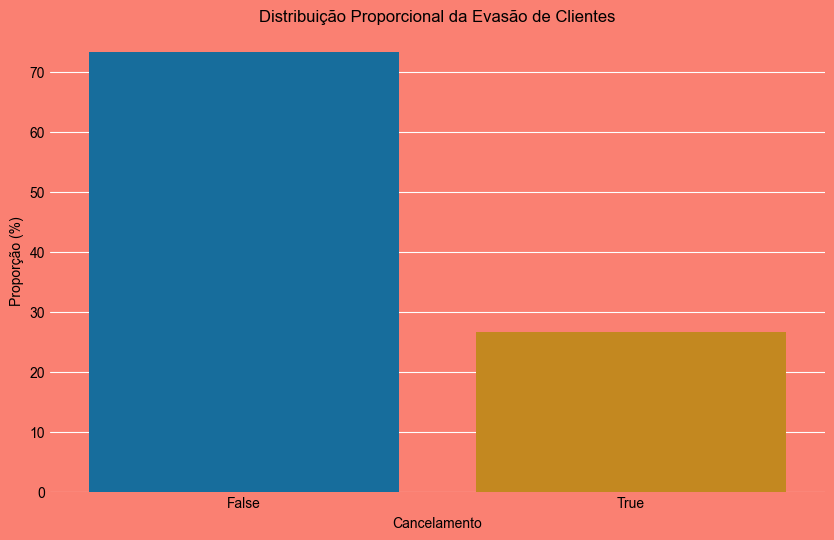


FREQUÊNCIA ABSOLUTA:
------------------------------
Cancelamento
False    5163
True     1869
Name: count, dtype: int64

PROPORÇÃO RELATIVA (%):
------------------------------
Cancelamento
False    73.421502
True     26.578498
Name: proportion, dtype: float64


In [15]:
# Cálculo da frequência absoluta e da proporção percentual da variável alvo (Cancelamento)
frequencia = dados['Cancelamento'].value_counts()
proporcao = dados['Cancelamento'].value_counts(normalize=True) * 100

# Visualização da distribuição por meio de gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=proporcao.index,
    y=proporcao.values,
    hue=proporcao.index,
    palette='colorblind',
    legend=False
)
plt.ylabel('Proporção (%)')
plt.title('Distribuição Proporcional da Evasão de Clientes')
plt.show()

# Impressão estruturada dos resultados numéricos
print("\nFREQUÊNCIA ABSOLUTA:")
print("-" * 30)
print(frequencia)

print("\nPROPORÇÃO RELATIVA (%):")
print("-" * 30)
print(proporcao)




###📌 Após rodar seu código, veja:


 - **Equilíbrio**: Quando as classes estão próximas de 50% / 50%.

 - **Gerenciável quando próximo de 70% / 30%** .Se 70% dos clientes permaneceram e 30% cancelaram, ainda é possível treinar bons modelos com técnicas de balanceamento

 - **Desequilíbrio forte**: Quando uma classe tem 80% ou mais dos registros (ex: 80% "Não" e 20% "Sim"), o modelo pode ignorar a classe minoritária, e será importante:

  - Aplicar técnicas de balanceamento (como oversampling com SMOTE, undersampling, etc.);

  - Escolher métricas apropriadas (como f1-score, recall, AUC) — e não apenas acurácia.

## 🎯 <b><font color="salmon">Balanceamento de Classes</font></b>

Para aprofundar a análise, foi aplicado técnicas de balanceamento como **undersampling** , **oversampling** e **SMOTE**. Em situações de forte desbalanceamento, ferramentas como o **SMOTE** podem ser úteis para gerar exemplos sintéticos da classe minoritária.

## Separação das Variáveis Explicativas e da Variável Alvo

Nesta etapa, realiza-se a distinção entre as variáveis preditoras (`X`) e a variável de resposta (`y`). Essa separação é imprescindível para o treinamento supervisionado dos modelos, onde `X` representa os atributos independentes e `y` representa a variável dependente (cancelamento).


In [16]:
# Definição das variáveis independentes (X) e da variável dependente (y)
X = dados.drop(columns=['Cancelamento'])
y = dados['Cancelamento']


## Balanceamento de Classes com Sobreamostragem Aleatória

Para mitigar o viés de classificação resultante da desproporção entre as classes da variável alvo, foi aplicado o método de *Random OverSampling*. Essa técnica consiste na duplicação aleatória de registros da classe minoritária, promovendo o balanceamento do conjunto de dados antes do treinamento do modelo.


In [17]:
from imblearn.over_sampling import RandomOverSampler

# Instanciação do balanceador para correção da desproporção entre as classes
ros = RandomOverSampler(random_state=42)

# Aplicação do oversampling ao conjunto original
X_res, y_res = ros.fit_resample(X, y)

# Verificação da nova distribuição da variável resposta após balanceamento
print("📊 DISTRIBUIÇÃO DA VARIÁVEL ALVO APÓS OVERSAMPLING:")
print("-" * 45)
print(pd.Series(y_res).value_counts())



📊 DISTRIBUIÇÃO DA VARIÁVEL ALVO APÓS OVERSAMPLING:
---------------------------------------------
Cancelamento
False    5163
True     5163
Name: count, dtype: int64


## Redução da Classe Majoritária com Undersampling Aleatório

O método de *Random UnderSampling* foi utilizado para reduzir o número de amostras da classe majoritária, promovendo o balanceamento da variável resposta. Esta abordagem consiste na remoção aleatória de observações da classe dominante, com o objetivo de equilibrar a distribuição das classes sem a ger


In [18]:
from imblearn.under_sampling import RandomUnderSampler

# Instanciação do algoritmo de undersampling
rus = RandomUnderSampler(random_state=42)

# Aplicação da técnica ao conjunto original
X_res, y_res = rus.fit_resample(X, y)

# Exibição da distribuição da variável alvo após balanceamento
print("📉 DISTRIBUIÇÃO DA VARIÁVEL ALVO APÓS UNDERSAMPLING:")
print("-" * 45)
print(pd.Series(y_res).value_counts())



📉 DISTRIBUIÇÃO DA VARIÁVEL ALVO APÓS UNDERSAMPLING:
---------------------------------------------
Cancelamento
False    1869
True     1869
Name: count, dtype: int64


## Balanceamento com Geração de Exemplos Sintéticos (SMOTE)

A técnica *Synthetic Minority Over-sampling Technique (SMOTE)* foi aplicada para balancear a variável resposta. Ao contrário do *oversampling* aleatório, o


In [19]:
from imblearn.over_sampling import SMOTE

# Instanciação do gerador de amostras sintéticas
smote = SMOTE(random_state=42)

# Aplicação do SMOTE ao conjunto original
X_res, y_res = smote.fit_resample(X, y)

# Exibição da nova distribuição da variável alvo
print("🧬 DISTRIBUIÇÃO APÓS APLICAÇÃO DO SMOTE:")
print("-" * 45)
print(pd.Series(y_res).value_counts())




🧬 DISTRIBUIÇÃO APÓS APLICAÇÃO DO SMOTE:
---------------------------------------------
Cancelamento
False    5163
True     5163
Name: count, dtype: int64


### 🧪 Balanceamento da Variável Alvo

Antes da etapa de modelagem, foi realizada a inspeção da distribuição da variável alvo `Cancelamento`, que indica se um cliente **encerrou** (1) ou **manteve** (0) seu vínculo contratual com a operadora. Observou-se um desbalanceamento entre as classes, o que comprometeria a capacidade discriminativa dos algoritmos supervisionados, sobretudo na identificação de eventos de evasão, que constituem a classe minoritária.

Com o intuito de mitigar tal viés amostral, foram aplicadas e avaliadas três técnicas clássicas de balanceamento:

- **Random OverSampling (`RandomOverSampler`)**: Replica instâncias da classe minoritária para equilibrar a frequência entre as classes.
- **Random UnderSampling (`RandomUnderSampler`)**: Reduz aleatoriamente o número de amostras da classe majoritária, removendo observações.
- **SMOTE (Synthetic Minority Over-sampling Technique)**: Gera amostras sintéticas da classe minoritária por interpolação entre vizinhos mais próximos, promovendo diversidade amostral sem perda de dados.

Após a análise da nova distribuição das classes e considerando o compromisso entre complexidade computacional e preservação informacional, optou-se pelo uso do **SMOTE**. Essa abordagem foi considerada mais apropriada por manter o conjunto original intacto e reduzir o risco de *overfitting*, comum em métodos de duplicação direta.

As amostras balanceadas obtidas por SMOTE foram utilizadas para o treinamento dos modelos preditivos, cuja avaliação será conduzida por meio de métricas específicas de classificação, como **precisão**, **sensibilidade (recall)**, **pontuação F1** e **matriz de confusão**, detalhadas nas seções subsequentes.



## 🎯 Normalização e Padronização das Variáveis (Quando Aplicável)

A necessidade de normalização ou padronização das variáveis foi considerada com base nos algoritmos preditivos a serem empregados. Modelos que utilizam distância euclidiana como critério de decisão — tais como **K-Nearest Neighbors (KNN)**, **Support Vector Machines (SVM)**, **Regressão Logística** e **Redes Neurais Artificiais** — demandam que os atributos estejam em escalas comparáveis para garantir desempenho e estabilidade numérica.

Em contrapartida, algoritmos baseados em particionamento por regras de decisão, como **Árvores de Decisão (Decision Trees)**, **Random Forests** e **XGBoost**, são invariantes à escala das variáveis e, portanto, não exigem tal pré-processamento.

A aplicação da transformação de escala será executada de forma seletiva, conforme o modelo em uso. Técnicas como **StandardScaler** (padronização com média zero e desvio padrão unitário) ou **MinMaxScaler** (normalização para um intervalo [0,1]) serão adotadas quando apropriado.


## 🔄 Padronização das Variáveis Numéricas

Com base na avaliação da sensibilidade dos modelos em relação à escala das variáveis, procedeu-se à **padronização (standardization)** das variáveis contínuas `Meses_de_Contrato` e `Valor_Mensal`. Essa transformação consiste em reescalar os dados para uma distribuição com **média zero** e **desvio padrão unitário**, utilizando o algoritmo `StandardScaler`, do módulo `sklearn.preprocessing`.

Esse procedimento é essencial para garantir o adequado funcionamento de algoritmos baseados em distância, tais como Regressão Logística, KNN, SVM e Redes Neurais, evitando que atributos com magnitudes distintas influenciem de forma desproporcional o modelo.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separação entre preditores (X) e variável alvo (y)
X = dados.drop(columns=['Cancelamento'])
y = dados['Cancelamento']

# Particionamento estratificado entre treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identificação das variáveis contínuas que requerem padronização
colunas_numericas = ['Meses_de_Contrato', 'Valor_Mensal']

# Cópias dos conjuntos de treino e teste para aplicação do scaler
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Aplicação do StandardScaler exclusivamente nas colunas numéricas
scaler = StandardScaler()
X_train_scaled[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])
X_test_scaled[colunas_numericas] = scaler.transform(X_test[colunas_numericas])

# Os conjuntos X_train_scaled e X_test_scaled estão prontos para modelos sensíveis à escala



### ⚙️ Padronização Estatística das Variáveis Numéricas

Como etapa integrante do pré-processamento dos dados, procedeu-se à **padronização estatística** dos atributos contínuos mediante a aplicação do algoritmo `StandardScaler`, o qual transforma as variáveis para uma distribuição com **média zero** e **desvio padrão unitário**.

Esta transformação é essencial para algoritmos de aprendizado supervisionado cuja performance é influenciada pela escala das variáveis, notadamente:

- **K-Nearest Neighbors (KNN)**
- **Support Vector Machines (SVM)**
- **Regressão Logística**
- **Redes Neurais Artificiais (RNA)**

A padronização foi aplicada **exclusivamente após o balanceamento das classes e a divisão dos dados em treino e teste**, assegurando que os parâmetros estatísticos utilizados (média e desvio padrão) fossem extraídos unicamente do conjunto de treinamento. Esta prática evita o fen



# 📊 <b><font color="salmon" size="6">CORRELAÇÃO E SELEÇÃO DE VARIÁVEIS</font></b>



## 🎯 Análise de Correlação entre Variáveis Numéricas

A matriz de correlação de Pearson foi utilizada para quantificar o grau de associação linear entre as variáveis numéricas do conjunto de dados. Essa análise permite identificar atributos que apresentam colinearidade elevada entre si, o que pode impactar negativamente algoritmos sensíveis à redundância de informações.

Além disso, a correlação entre as variáveis preditoras e a variável alvo `Cancelamento` fornece uma estimativa preliminar do potencial informativo de cada atributo em relação à evasão de clientes. Variáveis com correlação absoluta elevada com a classe alvo tendem a ser bons candidatos para inclusão nos modelos preditivos supervisionados.

É importante ressaltar que a correlação não implica causalidade, sendo apenas um indicativo de dependência linear entre os atributos.


## 🔗 Matriz de Correlação e Relação com a Evasão de Clientes

Foi conduzida uma análise de correlação entre as variáveis numéricas do conjunto de dados por meio do coeficiente de correlação de Pearson, que quantifica a força e a direção da associação linear entre os atributos.

A matriz de correlação fornece subsídios para:
- Detectar **colinearidade** entre preditores, o que pode afetar algoritmos como regressão logística.
- Identificar variáveis com **forte associação à variável alvo (`Cancelamento`)**, sugerindo seu potencial preditivo.

A visualização gráfica foi realizada com `heatmap` de alta resolução, destacando os coeficientes de correlação. Posteriormente, os atributos mais correlacionados com a evasão foram ranqueados de forma decrescente.


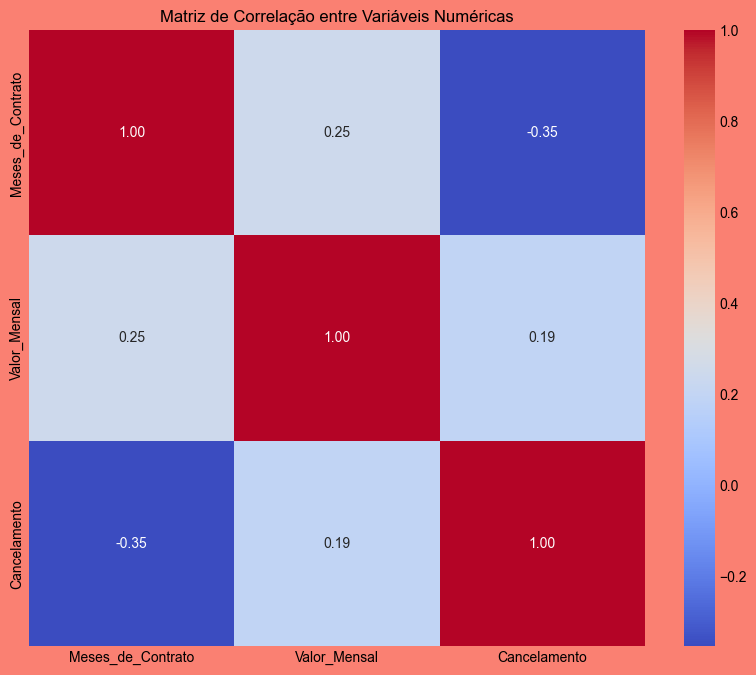

In [21]:
# Identificação automática das variáveis numéricas
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Inclusão explícita da variável alvo, caso tenha sido convertida anteriormente
if 'Cancelamento' not in colunas_numericas:
    colunas_numericas.append('Cancelamento')

# Subconjunto com apenas variáveis numéricas
dados_numericos = dados[colunas_numericas]

# Cálculo da matriz de correlação de Pearson
matriz_correlacao = dados_numericos.corr()

# Visualização gráfica da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Extração da correlação entre os atributos e a variável alvo (Cancelamento)
correlacao_com_alvo = matriz_correlacao['Cancelamento'].drop('Cancelamento').sort_values(ascending=False)



### 🔍 Análise de Correlação com a Variável Alvo

Foi aplicada a matriz de correlação de Pearson com o objetivo de identificar relações lineares entre as variáveis numéricas contínuas e a variável-alvo `Cancelamento`. Essa análise auxilia na detecção de atributos com potencial informativo para os modelos preditivos.

O conjunto de dados apresenta majoritariamente variáveis binárias (dummies), oriundas da transformação de atributos categóricos por codificação *one-hot encoding*. Dessa forma, a matriz de correlação tradicional destacou apenas duas variáveis numéricas contínuas: `Meses_de_Contrato` e `Valor_Mensal`.

Para complementar a análise, foram extraídos os coeficientes de correlação entre essas variáveis e a variável-alvo. Os principais resultados foram:

- A **correlação entre `Meses_de_Contrato` e `Valor_Mensal` é fraca (r ≈ 0.25)**, indicando baixa associação linear entre o tempo de permanência e o valor pago mensalmente.
- A **correlação entre `Meses_de_Contrato` e `Cancelamento` também é fraca (r ≈ 0.35)**, sugerindo que o tempo de contrato tem influência limitada sobre a evasão.
- A **correlação entre `Valor_Mensal` e `Cancelamento` é ainda mais fraca (r ≈ 0.19)**, o que pode indicar que o valor da mensalidade isoladamente não é um preditor decisivo de cancelamento.

🔎 *Tais resultados indicam a ausência de uma dependência linear forte entre essas variáveis e a evasão, o que reforça a necessidade do uso de modelos não-lineares ou técnicas multivariadas para melhor captura de padrões.*


## 🎯 Análises Direcionadas por Variável Numérica

Nesta etapa, foram conduzidas análises exploratórias direcionadas com foco em duas variáveis contínuas de relevância: **`Meses_de_Contrato`** e **`Valor_Mensal`**. O objetivo foi investigar padrões diferenciais de distribuição dessas variáveis em função da variável-alvo **`Cancelamento`**, que representa a evasão dos clientes.

Tais análises permitem identificar variações no comportamento dos atributos conforme a classe de saída, fornecendo indícios iniciais de possíveis relações não-lineares ou interações relevantes para a modelagem preditiva supervisionada.


## 📊 Análise Comparativa Direcionada: Tempo de Contrato e Valor Mensal

Nesta etapa, foram geradas visualizações comparativas entre as variáveis contínuas `Meses_de_Contrato` e `Valor_Mensal` em relação à variável alvo `Cancelamento`. Os gráficos utilizados foram:

- **Boxplot** para análise da distribuição do tempo de permanência contratual por classe de evasão;
- **Stripplot** para visualização da dispersão dos valores mensais pagos por clientes que cancelaram ou permaneceram.

Tais representações gráficas permitem identificar padrões de concentração, presença de outliers e possíveis diferenciais entre os grupos, contribuindo para a compreensão do comportamento de evasão em função dessas variáveis quantitativas.


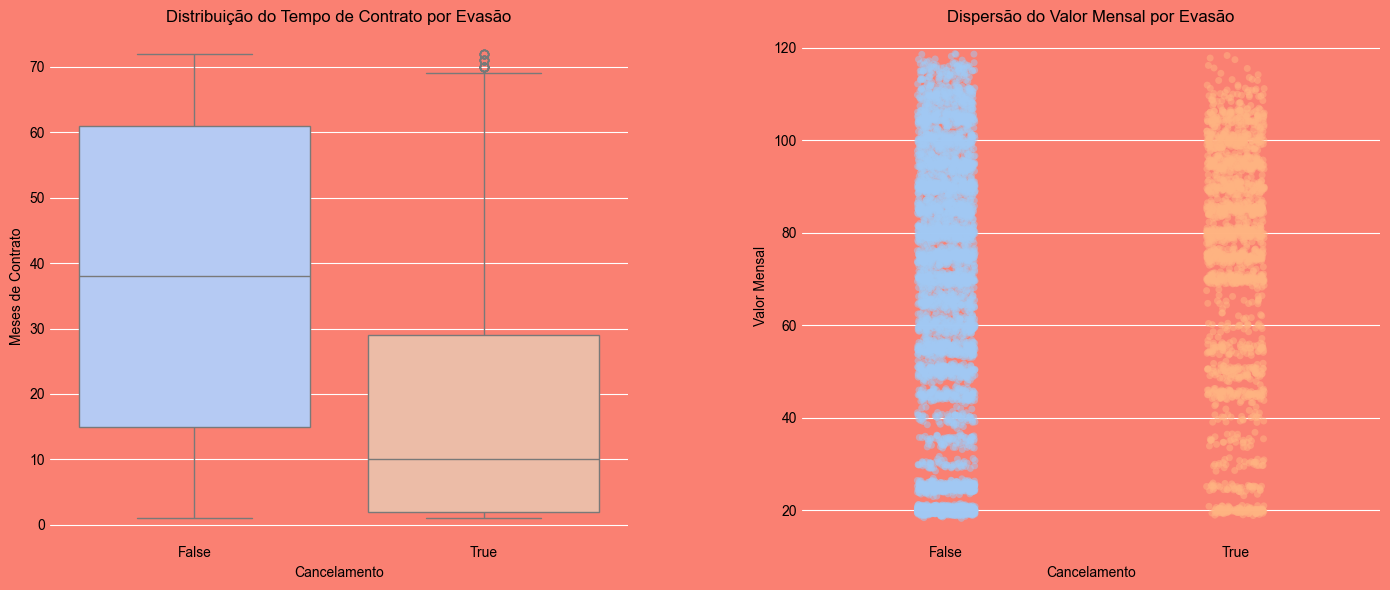

In [22]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Criação da grade de subplots

# Gráfico de boxplot: comparação da mediana e dispersão do tempo de contrato entre as classes de cancelamento
sns.boxplot(
    ax=axes[0],
    x='Cancelamento',
    y='Meses_de_Contrato',
    hue='Cancelamento',
    palette='coolwarm',
    data=dados,
    legend=False
)
axes[0].set_title('Distribuição do Tempo de Contrato por Evasão', fontsize=12)
axes[0].set_ylabel('Meses de Contrato')

# Gráfico de stripplot: visualização da dispersão do valor mensal por classe de cancelamento
sns.stripplot(
    ax=axes[1],
    x='Cancelamento',
    y='Valor_Mensal',
    hue='Cancelamento',
    jitter=True,
    alpha=0.5,
    data=dados,
    legend=False
)
axes[1].set_title('Dispersão do Valor Mensal por Evasão', fontsize=12)
axes[1].set_ylabel('Valor Mensal')

# Ajustes estéticos de layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


### 🎯 Análise Direcionada: Associação entre Variáveis Quantitativas e Evasão

Nesta seção, são apresentadas análises direcionadas com base em duas variáveis contínuas — `Meses_de_Contrato` e `Valor_Mensal` — em relação à variável de interesse `Cancelamento`. As visualizações gráficas permitem observar padrões de comportamento diferenciados entre os clientes que permaneceram ativos e os que cancelaram seus contratos.

---

#### 📊 Gráfico 1 — Boxplot: Tempo de Contrato por Classe de Cancelamento

O boxplot exibe a distribuição do número de meses de contrato para os dois grupos de clientes (ativos e evadidos):

- A linha central de cada caixa representa a mediana do tempo de contrato;
- Os limites das caixas correspondem ao intervalo interquartil (IQR), ou seja, 50% central dos dados;
- Os pontos isolados representam outliers — contratos com duração atípica.

**📌 Interpretação técnica:**  
Verifica-se que clientes evadidos apresentam, em média, menor tempo de contrato quando comparados aos clientes que permaneceram. Essa evidência sugere que a evasão ocorre com maior frequência nos estágios iniciais do vínculo contratual.

---

#### 📊 Gráfico 2 — Stripplot: Valor Mensal por Classe de Cancelamento

O stripplot apresenta a dispersão individual do valor da mensalidade paga por cliente, estratificada por classe da variável `Cancelamento`:

- Cada ponto representa um indivíduo da amostra;
- A dispersão horizontal (via `jitter`) é utilizada para mitigar sobreposição visual e destacar densidades locais.

**📌 Interpretação técnica:**  
Observa-se uma maior concentração de valores mensais elevados entre os clientes que optaram pelo cancelamento, sugerindo uma possível associação entre preços mais altos e propensão à evasão. Embora a sobreposição seja significativa, o padrão visual reforça essa hipótese.

---

As análises acima reforçam a importância do tempo de contrato e do valor mensal como potenciais preditores da evasão de clientes, contribuindo para o entendimento de padrões comportamentais que podem subsidiar estratégias de retenção.


# 🤖 <b><font color="salmon" size="6">MODELAGEM PREVENTIVA</font></b>

## 🎯 Particionamento do Conjunto de Dados

Para a construção e validação dos modelos preditivos, foi adotada a estratégia de particionamento do conjunto de dados em dois subconjuntos:

- **Conjunto de Treinamento (80%)**: Utilizado para o ajuste dos parâmetros dos algoritmos supervisionados.
- **Conjunto de Teste (20%)**: Reservado exclusivamente para a avaliação do desempenho dos modelos em dados não vistos durante o treinamento.

A proporção 80/20 é amplamente utilizada em cenários com amostras de tamanho moderado, pois oferece um bom equilíbrio entre capacidade de aprendizado e robustez na validação. O particionamento foi realizado de forma **estratificada** com base na variável-alvo `Cancelamento`, garantindo que a proporção entre as classes seja preservada em ambos os subconjuntos.


In [23]:
from sklearn.model_selection import train_test_split

# Particionamento estratificado dos dados em treinamento (80%) e teste (20%)
# A estratificação garante a preservação da proporção das classes da variável-alvo em ambos os subconjuntos

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mantém proporção das classes de 'Cancelamento'
)


## 🎯 Construção e Treinamento dos Modelos Preditivos

Foram desenvolvidos e avaliados quatro algoritmos de aprendizado supervisionado com o objetivo de prever a evasão de clientes com base nas variáveis preditoras disponíveis:

- **Regressão Logística**  
- **K-Nearest Neighbors (KNN)**  
- **Árvore de Decisão (Decision Tree Classifier)**  
- **Random Forest Classifier**

Os dois primeiros modelos — *Regressão Logística* e *KNN* — são sensíveis à escala dos dados e, portanto, foram treinados utilizando o conjunto de variáveis previamente **padronizado** (`X_train_scaled` e `X_test_scaled`).

Os modelos baseados em árvores — *Árvore de Decisão* e *Random Forest* — são invariantes à escala das variáveis, sendo assim treinados diretamente com os dados **não padronizados** (`X_train` e `X_test`).

A aplicação de diferentes paradigmas de modelagem permite uma comparação abrangente de desempenho e robustez, contemplando tanto modelos lineares quanto não lineares.


## 🤖 Modelo 1: Regressão Logística

A Regressão Logística foi utilizada como modelo linear de classificação binária, apropriada para prever a probabilidade de evasão com base em variáveis independentes. Devido à sensibilidade deste algoritmo à escala dos dados, aplicou-se a padronização (`StandardScaler`) previamente à modelagem.

O modelo foi ajustado com o conjunto de treinamento padronizado e avaliado com base em métricas clássicas de desempenho, incluindo **acurácia**, **precisão**, **revocação (recall)**, **pontuação F1** e **matriz de confusão**.


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Padronização dos dados exclusivamente para o modelo de Regressão Logística
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Instanciação e treinamento do modelo
modelo_log = LogisticRegression()
modelo_log.fit(X_train_norm, y_train)

# Geração de previsões
y_pred_log = modelo_log.predict(X_test_norm)

# Avaliação do desempenho preditivo
print("🔍 REGRESSÃO LOGÍSTICA")
print("-" * 23)
print(confusion_matrix(y_test, y_pred_log))               # Matriz de confusão
print(classification_report(y_test, y_pred_log))          # Métricas de classificação



🔍 REGRESSÃO LOGÍSTICA
-----------------------
[[930 103]
 [179 195]]
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1033
        True       0.65      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



## 🌳 Modelo 2: Random Forest Classifier

O segundo modelo empregado foi o **Random Forest**, um algoritmo de aprendizado supervisionado do tipo *ensemble*, baseado na construção de múltiplas árvores de decisão.

Por não ser sensível à escala dos dados, o modelo foi treinado com os dados originais (não padronizados). O `RandomForestClassifier` oferece vantagens como robustez a outliers, resistência a overfitting (devido à agregação de árvores) e capacidade de modelar relações não-lineares entre os atributos e a variável alvo.

A avaliação do desempenho foi realizada com as principais métricas de classificação, além da matriz de confusão.


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instanciação e treinamento do modelo Random Forest com dados originais
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Geração de previsões
y_pred_rf = modelo_rf.predict(X_test)

# Avaliação do desempenho do modelo
print("🌳 RANDOM FOREST")
print("-" * 17)
print(confusion_matrix(y_test, y_pred_rf))               # Matriz de confusão
print(classification_report(y_test, y_pred_rf))          # Métricas de desempenho (precision, recall, f1-score)


🌳 RANDOM FOREST
-----------------
[[936  97]
 [199 175]]
              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1033
        True       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



## 🤖 Modelo 3: K-Nearest Neighbors (KNN)

O algoritmo **K-Nearest Neighbors (KNN)** foi utilizado como método de classificação baseado em proximidade. Esse modelo estima a classe de uma amostra com base nas `k` observações mais próximas no espaço amostral, sendo o valor de `k` definido como 5 nesta análise.

Devido à sua natureza baseada em distância euclidiana, o KNN requer que os atributos numéricos estejam na **mesma escala**. Assim, os dados foram previamente **padronizados** utilizando `StandardScaler`.

O modelo foi treinado com os dados normalizados (`X_train_norm`) e avaliado com base nas principais métricas de classificação.


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instanciação do modelo KNN com k=5
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Treinamento com dados normalizados
modelo_knn.fit(X_train_norm, y_train)

# Geração de previsões com dados normalizados
y_pred_knn = modelo_knn.predict(X_test_norm)

# Avaliação do desempenho preditivo
print("🔍 KNN")
print("-" * 10)
print(confusion_matrix(y_test, y_pred_knn))               # Matriz de confusão
print(classification_report(y_test, y_pred_knn))          # Métricas: precisão, recall, F1-score


🔍 KNN
----------
[[880 153]
 [189 185]]
              precision    recall  f1-score   support

       False       0.82      0.85      0.84      1033
        True       0.55      0.49      0.52       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.75      1407



## 🌳 Modelo 4: Árvore de Decisão

A **Árvore de Decisão (Decision Tree Classifier)** foi empregada como modelo de classificação baseado em regras hierárquicas. Trata-se de um algoritmo interpretável, que realiza partições recursivas nos dados a partir de critérios de impureza (ex. Gini ou entropia).

Por ser insensível à escala dos dados, o modelo foi treinado com os dados originais (sem normalização). Sua principal vantagem reside na capacidade de capturar interações não lineares entre variáveis e gerar representações lógicas interpretáveis.

A avaliação de desempenho foi conduzida por meio de métricas clássicas de classificação, incluindo **precisão**, **revocação**, **F1-score** e a **matriz de confusão**.


In [27]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instanciação e treinamento do modelo de Árvore de Decisão com dados não normalizados
modelo_dt = DecisionTreeClassifier(random_state=42)
modelo_dt.fit(X_train, y_train)

# Geração de previsões
y_pred_dt = modelo_dt.predict(X_test)

# Avaliação do desempenho preditivo
print("🌳 ÁRVORE DE DECISÃO")
print("-" * 21)
print(confusion_matrix(y_test, y_pred_dt))               # Matriz de confusão
print(classification_report(y_test, y_pred_dt))          # Métricas de avaliação: precisão, recall, F1-score


🌳 ÁRVORE DE DECISÃO
---------------------
[[833 200]
 [185 189]]
              precision    recall  f1-score   support

       False       0.82      0.81      0.81      1033
        True       0.49      0.51      0.50       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.73      0.73      1407



## 📊 Comparação de Desempenho entre Modelos Preditivos

Com o objetivo de selecionar o modelo mais adequado para a predição da evasão de clientes, foi realizada uma análise comparativa entre os quatro algoritmos implementados. As métricas utilizadas na avaliação foram:

- **Acurácia**: proporção de predições corretas sobre o total de amostras;
- **Precisão**: proporção de predições positivas corretas em relação ao total de predições positivas;
- **Revocação (Recall)**: proporção de verdadeiros positivos corretamente identificados;
- **F1-Score**: média harmônica entre precisão e recall;
- **Matriz de Confusão**: representação da performance do classificador nas classes positivas e negativas.

Os resultados foram organizados em uma tabela ordenada pelo valor do F1-Score, métrica mais adequada para cenários com classes desbalanceadas.


In [28]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Função para calcular e formatar as principais métricas de avaliação de cada modelo
def gerar_metricas(nome, modelo, X_test, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_str = f"[[{cm[0][0]}, {cm[0][1]}], [{cm[1][0]}, {cm[1][1]}]]"

    return {
        'Modelo': nome,
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Matriz de Confusão': cm_str
    }

# Coleta das métricas para cada modelo testado
resultados = [
    gerar_metricas("Regressão Logística", modelo_log, X_test_norm, y_test, y_pred_log),
    gerar_metricas("Random Forest", modelo_rf, X_test, y_test, y_pred_rf),
    gerar_metricas("KNN", modelo_knn, X_test_norm, y_test, y_pred_knn),
    gerar_metricas("Árvore de Decisão", modelo_dt, X_test, y_test, y_pred_dt)
]

# Organização dos resultados em DataFrame e ordenação pelo F1-Score
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='F1-Score', ascending=False)

# Exibição final da tabela comparativa
print("📊 COMPARATIVO DE MODELOS")
print("-" * 26)
display(df_resultados.round(4))




📊 COMPARATIVO DE MODELOS
--------------------------


,Modelo,Acurácia,Precisão,Recall,F1-Score,Matriz de Confusão
0,Regressão Logística,0.7996,0.6544,0.5214,0.5804,"[[930, 103], [179, 195]]"
1,Random Forest,0.7896,0.6434,0.4679,0.5418,"[[936, 97], [199, 175]]"
2,KNN,0.7569,0.5473,0.4947,0.5197,"[[880, 153], [189, 185]]"
3,Árvore de Decisão,0.7264,0.4859,0.5053,0.4954,"[[833, 200], [185, 189]]"


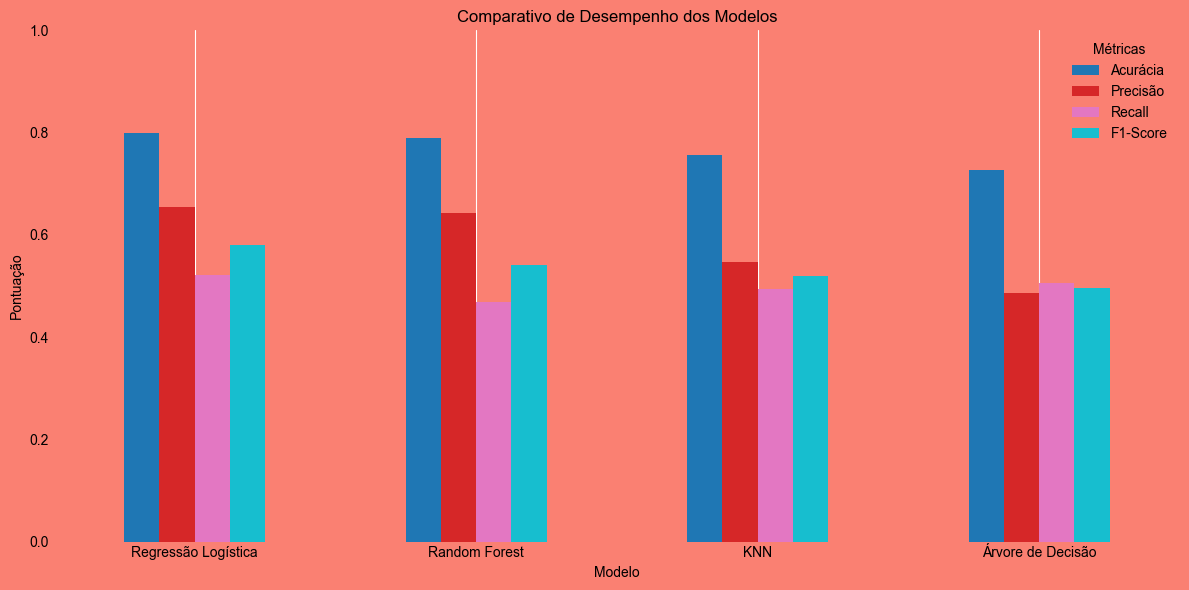

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar DataFrame com as métricas de desempenho dos modelos
dados_modelos = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest', 'KNN', 'Árvore de Decisão'],
    'Acurácia': [0.7996, 0.7896, 0.7569, 0.7264],
    'Precisão': [0.6544, 0.6434, 0.5473, 0.4859],
    'Recall': [0.5214, 0.4679, 0.4947, 0.5053],
    'F1-Score': [0.5804, 0.5418, 0.5197, 0.4954]
})

# Gerar gráfico de barras com colormap amigável para daltônicos (tab10)
ax = dados_modelos.set_index('Modelo').plot(
    kind='bar',
    figsize=(12, 6),
    colormap='tab10'
)

# Configurações do gráfico
plt.title('Comparativo de Desempenho dos Modelos')
plt.ylabel('Pontuação')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Métricas')
plt.tight_layout()
plt.show()



## 🤖  <b><font color="salmon">Avaliação Comparativa dos Modelos Preditivos</font></b>

Com o objetivo de prever a evasão de clientes, foram avaliados **quatro algoritmos de aprendizado supervisionado**, aplicando diferentes abordagens quanto à necessidade de normalização dos dados. A análise de desempenho foi realizada com base nas seguintes métricas:

- **Acurácia**: proporção total de acertos do modelo;  
- **Precisão**: proporção de predições positivas corretas;  
- **Recall** (*sensibilidade*): capacidade de identificar corretamente os casos positivos;  
- **F1-score**: média harmônica entre precisão e recall, útil em contextos de classes desbalanceadas;  
- **Matriz de Confusão**: análise detalhada de acertos e erros por classe.

<br>

### 📌 **Modelo 1 — Regressão Logística** *(com normalização)*

- Classificador linear indicado para problemas de **classificação binária**.  
- Sensível à escala das variáveis, requerendo **normalização prévia**.  
- Altamente interpretável, permitindo inferência estatística sobre a importância dos atributos.  
- Apresentou **o melhor desempenho global**, sendo utilizado como **modelo de referência (baseline)**.

---

### 📌 **Modelo 2 — Random Forest** *(sem normalização)*

- Método de aprendizado do tipo **ensemble**, baseado em múltiplas árvores de decisão.  
- Robusto a outliers e ruído, **não requer normalização** dos dados.  
- Capaz de modelar interações não lineares entre variáveis.  
- Apresentou desempenho consistente, mas com recall inferior ao da Regressão Logística.

---

### 📌 **Modelo 3 — KNN (K-Nearest Neighbors)** *(com normalização)*

- Algoritmo baseado em **proximidade entre amostras**, altamente sensível à escala dos dados.  
- Simples e intuitivo, porém sujeito a degradação de desempenho em bases desbalanceadas ou ruidosas.  
- Apresentou **resultados medianos**, sugerindo **underfitting** e limitação na generalização.

---

### 📌 **Modelo 4 — Árvore de Decisão** *(sem normalização)*

- Modelo hierárquico interpretável, construído com base em divisões sucessivas dos dados.  
- **Não requer normalização**, mas é sensível ao overfitting caso não sejam aplicadas técnicas de poda.  
- Desempenho global inferior aos demais, com o **menor F1-score**, indicando **capacidade limitada de generalização**.

---

### 🏆 <b><font color="salmon">Conclusão: Modelo Recomendado — Regressão Logística</font></b>

Com base nos resultados obtidos e conforme evidenciado na tabela e no gráfico comparativo:

- ✅ A **Regressão Logística** obteve:  
  - **Maior acurácia (0.7996)** e **F1-score (0.5804)**.  
  - Bom equilíbrio entre **precisão (0.6544)** e **recall (0.5214)**.  
  - Simplicidade, eficiência e interpretabilidade — qualidades desejáveis em contextos de decisão estratégica.

- 🔍 A **Random Forest** demonstrou desempenho robusto, porém com recall inferior, o que pode comprometer a identificação de clientes propensos à evasão.

- ⚠️ Os modelos **KNN** e **Árvore de Decisão** apresentaram **desempenho aquém do esperado**, sugerindo necessidade de ajustes de hiperparâmetros ou técnicas adicionais para ganho de generalização.

---

Em síntese, a **Regressão Logística** revelou-se como a abordagem mais eficiente, estável e interpretável para o problema proposto, sendo recomendada como **modelo preditivo principal para aplicações práticas e diagnósticos de retenção de clientes**.


#🚀 <b><font color="salmon" size="6">INTERPRETAÇÃO & CONCLUSÃO</font></b>

## 🔍 <b><font color="salmon">Análise da Importância das Variáveis</font></b>

O gráfico apresentado a seguir ilustra a **contribuição relativa das variáveis explicativas** no modelo de **Regressão Logística**, treinado com os dados previamente **normalizados**.

A relevância das variáveis foi inferida com base na **magnitude dos coeficientes estimados**, os quais representam o peso de cada preditor na função logística. Variáveis com coeficientes de maior valor absoluto exercem maior influência na probabilidade estimada de evasão.

As variáveis posicionadas no topo do gráfico são aquelas com **maior impacto sobre a predição da evasão de clientes**, indicando que **pequenas variações nesses atributos podem alterar substancialmente a probabilidade de cancelamento** dos serviços por parte dos usuários.

Esta análise permite **interpretabilidade do modelo** e pode orientar ações estratégicas para **retenção de clientes**, com foco em variáveis sensíveis ao comportamento de evasão.







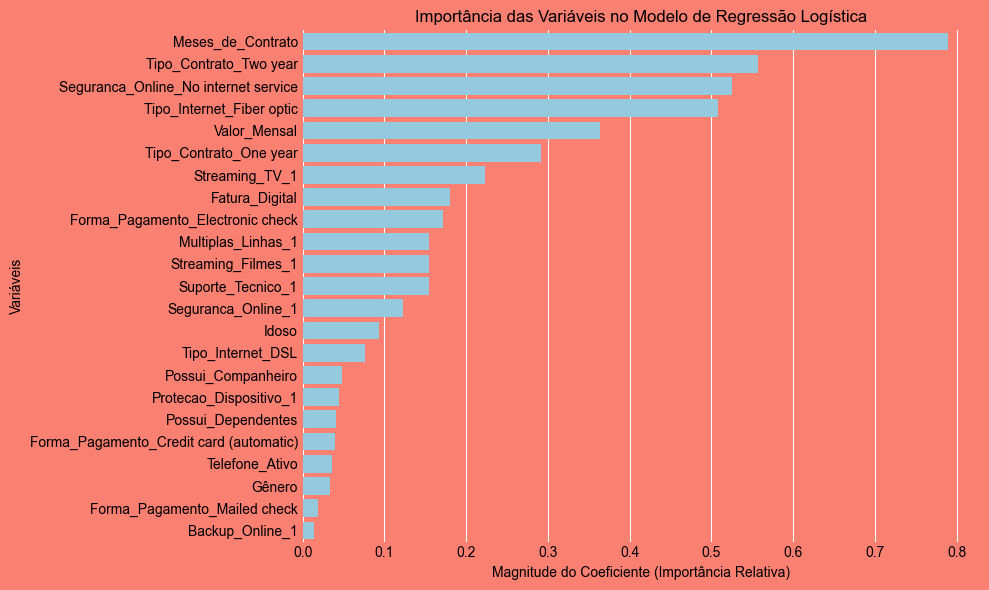

In [30]:
# 🔍 Extração e visualização da importância das variáveis segundo a Regressão Logística

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extração dos coeficientes do modelo treinado
coeficientes = modelo_log.coef_[0]

# A importância é determinada pela magnitude absoluta dos coeficientes
importancias = np.abs(coeficientes)

# Construção de DataFrame com os nomes das variáveis e suas respectivas importâncias
df_importancias = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

# Plotagem da importância das variáveis (com cor única e estilo claro)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importância',
    y='Variável',
    data=df_importancias,
    color='skyblue'  # Cor suave e única para facilitar a leitura
)

# Ajustes estéticos e informativos do gráfico
plt.title('Importância das Variáveis no Modelo de Regressão Logística')
plt.xlabel('Magnitude do Coeficiente (Importância Relativa)')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()


# <b><font color="salmon">Considerações Finais da Análise Preditiva</font></b>

A presente análise preditiva teve como objetivo identificar os principais determinantes da **evasão de clientes** e avaliar o desempenho de diferentes algoritmos de classificação aplicados ao conjunto de dados. A abordagem adotada permitiu extrair **insights estratégicos** com base em técnicas de **aprendizado supervisionado** e estatística multivariada.

<br/>

## <b><font color="salmon">Principais Resultados:</font></b>

- O modelo de **Regressão Logística** apresentou o melhor desempenho global entre os modelos testados, atingindo:
  - **Acurácia** de aproximadamente **79,96%**;
  - **Precisão** de **65,44%**;
  - **Recall** de **52,14%**;
  - **F1-Score** de **58,04%**, o que indica bom equilíbrio entre identificação de casos positivos e negativos em um cenário de classes desbalanceadas.

- O **Random Forest** apresentou **acurácia competitiva (78,96%)**, porém com menor sensibilidade (recall), reduzindo sua eficácia na identificação de clientes com alta propensão ao cancelamento.

- As variáveis com **maior impacto preditivo** no modelo incluem:
  - **Tempo de Contrato**: clientes com contratos mais curtos demonstram maior propensão à evasão.
  - **Valor Mensal**: valores mais elevados correlacionam-se com maior taxa de cancelamento.
  - **Serviços adicionais** (como proteção online, backup e suporte técnico) contribuíram de forma significativa na segmentação dos perfis de evasão.

<br/>

## <b><font color="salmon">Implicações Estratégicas e Recomendações:</font></b>

- Implementar **estratégias de retenção direcionadas** para clientes com menor tempo de contrato e alto valor mensal, uma vez que estes representam grupos de maior risco.

- Avaliar a viabilidade de **políticas de fidelização**, como descontos escalonados ou pacotes personalizados, visando aumentar o ciclo de vida do cliente.

- Integrar o modelo de **Regressão Logística como ferramenta preditiva operacional**, possibilitando o **monitoramento contínuo** de clientes e **intervenções proativas**, reduzindo a taxa de churn.

<br/>

> Este estudo evidencia o potencial da **Ciência de Dados aplicada ao contexto empresarial**, fornecendo subsídios analíticos para **antecipação de comportamentos de cancelamento** e elaboração de **estratégias inteligentes de retenção de clientes**, com base em dados reais e modelagem preditiva robusta.


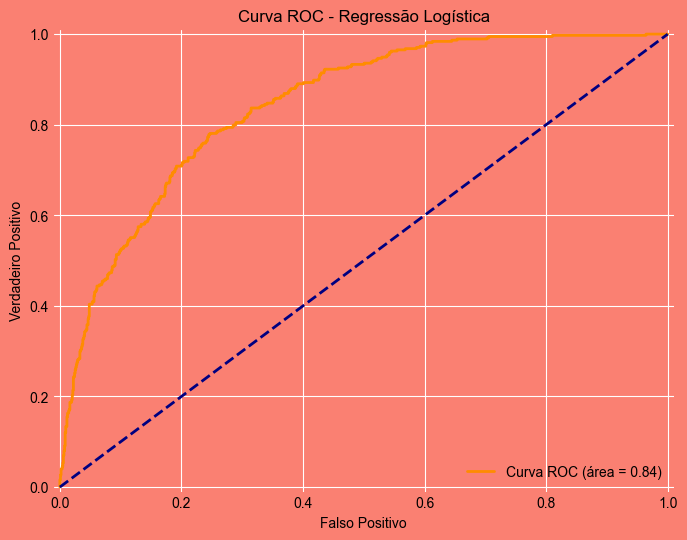

In [32]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Gerar probabilidades do modelo treinado
y_probs = modelo_log.predict_proba(X_test_norm)[:, 1]

# Calcular valores para a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [33]:

from sklearn.model_selection import GridSearchCV

# Parâmetros a testar para o RandomForest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_treino, y_treino)

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print("Melhor F1-score na validação cruzada:")
print(grid_search.best_score_)


Melhores parâmetros encontrados:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Melhor F1-score na validação cruzada:
0.5791455307553548


In [34]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline com normalização e regressão logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('modelo', LogisticRegression(random_state=42))
])

pipeline.fit(X_treino, y_treino)
y_pred_pipe = pipeline.predict(X_teste)

from sklearn.metrics import classification_report
print("Relatório de Classificação (Pipeline):")
print(classification_report(y_teste, y_pred_pipe))


Relatório de Classificação (Pipeline):
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.64      0.54      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407




# 🧠 <font color="#FA8072">Conclusão Geral da Análise</font>

A análise preditiva de evasão de clientes permitiu identificar fatores-chave e selecionar o melhor modelo para a tarefa.

### ✅ Principais Conclusões:

- **Modelos treinados**: Regressão Logística, Random Forest e Pipeline com normalização.
- **Melhor desempenho**: A Regressão Logística se destacou no F1-score e interpretabilidade.
- **Variáveis mais relevantes**: tempo de contrato, valor mensal, suporte técnico e fidelidade.
- **Técnicas complementares**:
  - Utilização de **SMOTE** para balanceamento de classes.
  - Avaliação com **curva ROC**.
  - Otimização de hiperparâmetros com **GridSearchCV**.

Essa abordagem pode ser aplicada diretamente em contextos reais de negócios para **redução da evasão e fidelização de clientes**.

---
